In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [2]:
md = pd.read_csv('/Volumes/LaCie/_2021_08_screen/S1_md.csv')
compound_key = pd.read_csv('/Volumes/LaCie/_2021_08_screen/S1_randomized_compounds.csv', index_col=0)

In [3]:
compound_key['Plate Number'] =  compound_key['Plate Number'].str.strip().str[-1]
md['Compound library ID'] = md['Compound library ID'].str.strip().str[-1]


In [4]:
md.drop(md.columns[[3, 4, 12, 13, 16, 17, 18, 19, 20, 21]], axis = 1, inplace = True)
md = md.drop(md.index[0], axis=0)
md.head()

,Date:,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Temp (C),Humidity,Image ID,Scanner Slot:
1,8/23/21,Hodan,S1_R1_1,1,B2,B3,B4,B5,22.0,40.0,S1_001,1
2,8/23/21,Hodan,S1_R1_2,1,C2,C3,C4,C5,22.0,40.0,S1_001,2
3,8/23/21,Hodan,S1_R1_3,1,D2,D3,D4,D5,22.0,40.0,S1_001,3
4,8/23/21,Hodan,S1_R1_4,1,E2,E3,E4,E5,22.0,40.0,S1_001,4
5,8/23/21,Hodan,S1_R1_5,1,F2,F3,F4,F5,22.0,40.0,S1_002,1


In [5]:
def add_compoundA(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well A'])]['Compound']
    #print(compound.values)
    return compound.values[0]

def add_compoundB(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well B'])]['Compound']
    #print(compound.values)
    return compound.values[0]

def add_compoundC(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well C'])]['Compound']
    return compound.values[0]

def add_compoundD(row, compound_map ):
    compound = compound_map.loc[
        (compound_map['Plate Number']==row['Compound library ID']) & 
        (compound_map['Compound Well']==row['Compound Well D'])]['Compound']
    return compound.values[0]

In [6]:
md['Compound A'] = md.apply(
    lambda row: add_compoundA(row, compound_key), axis=1)

md['Compound B'] = md.apply(
    lambda row: add_compoundB(row, compound_key), axis=1)
    
md['Compound C'] = md.apply(
    lambda row: add_compoundC(row, compound_key), axis=1)
    
md['Compound D'] = md.apply(
    lambda row: add_compoundD(row, compound_key), axis=1)

In [7]:
ia_data = pd.read_csv('/Volumes/LaCie/_2021_08_screen/ai/All_reps.csv', index_col=0)



,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID,Large Object
0,1A,380.0,0.108197,NaN,NaN,S1_001,3048.0,NaN,False
1,1B,387.0,0.125786,NaN,NaN,S1_001,3030.0,NaN,True
2,1C,407.0,-0.086705,NaN,NaN,S1_001,3010.0,NaN,True
3,1D,415.0,-0.101449,NaN,NaN,S1_001,3031.0,NaN,True
4,2A,363.0,-0.193220,NaN,NaN,S1_001,3065.0,NaN,True


In [8]:
md['Scanner Slot:'] = md['Scanner Slot:'].apply(str)

In [9]:
def add_PlateID(row, metadata):
    slotID = row['WellNo'][0]
    pid = metadata.loc[
        (metadata['Image ID']==row['File Name']) & 
        (metadata['Scanner Slot:']==slotID)]['Plate ID']
    #print(pid)
    return pid.values[0]

In [10]:
ia_data['Plate ID'] = ia_data.apply(
    lambda row: add_PlateID(row, md), axis=1)

In [11]:
def add_Compound(row, metadata):
    wellID = row['WellNo'][1]
    if wellID == 'A':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound A']
    elif wellID == 'B':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound B']
    elif wellID == 'C':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound C']
    elif wellID == 'D':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound D']
   #print(compound)
    return compound.values[0]

In [12]:
ia_data['Compound'] = ia_data.apply(
    lambda row: add_Compound(row, md), axis=1)

In [17]:
ia_data = ia_data.drop(['Strain', 'Large Object'], axis=1)

In [16]:
dups = ['S1_R1_1', 'S1_R1_2', 'S1_R1_3', 'S1_R1_4', 'S1_R1_5', 'S1_R1_6']
ia_data = ia_data[~ia_data['Plate ID'].isin(dups)]
ia_data.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID,Large Object
8,3A,229.0,-0.265957,5-Aminolevulinic acid (hydrochloride),NaN,S1_002,3058.0,S1_R1_7,False
9,3B,275.0,-0.125541,Isobutanol,NaN,S1_002,3065.0,S1_R1_7,True
10,3C,231.0,-0.353535,Methyl palmitate,NaN,S1_002,3043.0,S1_R1_7,False
11,3D,221.0,-0.255814,Safranal,NaN,S1_002,3075.0,S1_R1_7,False
12,4A,270.0,-0.176991,Spinosad,NaN,S1_002,3051.0,S1_R1_8,False


In [42]:
sums = ia_data.groupby('Compound').mean().reset_index()

In [43]:
sums.head()

,Compound,Total Worms,Chemotaxis,Well width
0,(+)-Carvone,350.666667,0.086578,3053.000000
1,(-)-Borneol,289.000000,-0.054634,3042.333333
2,(-)-Cedrene,345.333333,0.128944,3036.000000
3,(-)-Huperzine A,270.333333,0.244933,3052.666667
4,1-octanol,217.333333,-0.458012,3042.333333


In [19]:
#sums.to_csv('/Volumes/LaCie/_2021_08_screen/quick_summary.csv')

In [20]:
#ia_data.to_csv('/Volumes/LaCie/_2021_08_screen/S1_ub_ia.csv')

In [25]:
#Generating a file path to dynamically read in worm location files
wrm_locs_fldr = plb.Path('/Volumes/LaCie/_2021_08_screen/ai/')

In [28]:
def get_worm_locs(row, wrms, result_dict): 

    fname = row['File Name']
    wellnum = row['WellNo']
    loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
    temp = pd.read_csv(loc_fname)
    compound = row['Compound']
    xs = temp['X']
    #xs = list(temp['centroid-1'])
    if compound in result_dict:
        result_dict[compound] = result_dict[compound].append(xs)
        result_dict[compound].reset_index(inplace=True, drop=True)
        #result_dict[compound] = result_dict[compound]+xs
    else:
        result_dict[compound]=xs
    
    return result_dict

In [48]:
# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in ia_data.iterrows():
    pooled = get_worm_locs(row, wrm_locs_fldr, results_dict)

In [49]:
#Remember that Dabest requires a dataframe. Casting dict to df
pooled_df = pd.DataFrame.from_dict(pooled)


In [50]:
pooled_df.head()

,5-Aminolevulinic acid (hydrochloride),Isobutanol,Methyl palmitate,Safranal,Spinosad,Ellagic acid,Camphor,Citronellol,Paeoniflorin,Thiophene,...,Geranyl Acetate,Oleanolic Acid,L-Ornithine,Anethole trithione,Myrcene,Pogostone,Octyle acetate,Lapachol,Cinnamyl Alcohol,"2,3-Dihydrobenzofuran"
0,1110.0,2026.0,1253.0,2351.0,508.0,1773.0,2051.0,1993.0,2627.0,2152.0,...,562.0,462.0,380.0,620.0,2376.0,1078.0,1349.0,1459.0,844.0,689.0
1,626.0,1605.0,1434.0,1506.0,1638.0,1722.0,1144.0,1286.0,2610.0,1955.0,...,406.0,644.0,574.0,770.0,1813.0,936.0,1812.0,641.0,1178.0,1351.0
2,1503.0,2059.0,1901.0,1095.0,854.0,1255.0,1429.0,890.0,1810.0,2231.0,...,1012.0,336.0,763.0,1240.0,1164.0,984.0,1212.0,738.0,465.0,1294.0
3,993.0,1880.0,1582.0,2315.0,904.0,1415.0,1655.0,1708.0,1574.0,1192.0,...,817.0,492.0,1403.0,1178.0,1607.0,1340.0,777.0,1211.0,1936.0,414.0
4,1280.0,2623.0,2115.0,603.0,1986.0,2279.0,2700.0,1039.0,1097.0,928.0,...,1604.0,722.0,1058.0,1618.0,1929.0,386.0,829.0,1838.0,687.0,1519.0


In [46]:
ia_sort = sums
condition = (ia_sort.Compound=='DMSO') | (ia_sort.Compound=='H2O')

excluded = ia_sort[condition]
included = ia_sort[~condition]
sorted = included.sort_values(by='Chemotaxis',ascending=True)
ia_sort = pd.concat([excluded, sorted])
ia_sort.head()

,Compound,Total Worms,Chemotaxis,Well width
31,DMSO,356.000000,-0.009224,3040.333333
44,H2O,305.000000,0.004074,3050.333333
4,1-octanol,217.333333,-0.458012,3042.333333
68,Phytol,208.333333,-0.424344,3034.333333
36,Ellagic acid,273.666667,-0.299082,3042.333333


In [51]:
cmpd_ordr = ia_sort['Compound'].to_list()
db_obj = db.load(pooled_df, idx=(cmpd_ordr))

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


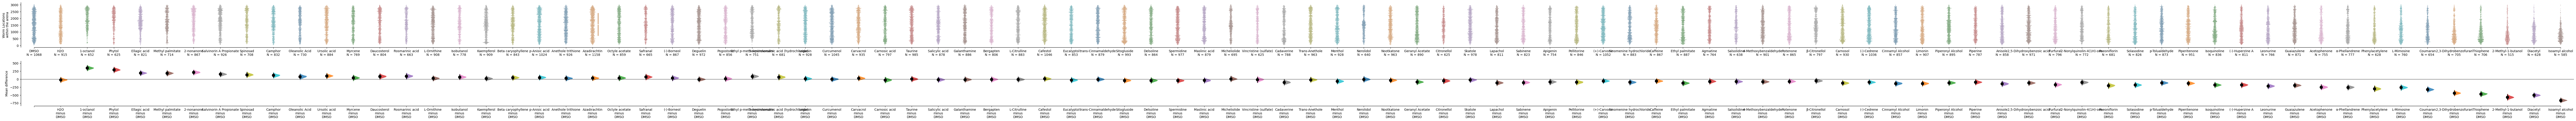

In [52]:
S1_CI_plt = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena')

In [81]:
neut = ia_sort[(ia_sort['Chemotaxis']< .2) & (ia_sort['Chemotaxis']> -.2)]
pos = ia_sort[ia_sort['Chemotaxis']>= .2]
neg = ia_sort[ia_sort['Chemotaxis']<= -.2]


In [82]:

dmso = ia_sort[ia_sort['Compound'] == 'DMSO']
pos = pos.sort_values(by='Chemotaxis', ascending=False)
pos = pd.concat([dmso, pos])
pos_ordr = pos['Compound'].to_list()
pos.head()

,Compound,Total Worms,Chemotaxis,Well width
31,DMSO,356.000000,-0.009224,3040.333333
45,Isoamyl alcohol,195.000000,0.820635,3051.666667
35,Diacetyl,209.333333,0.708201,3058.333333
7,2-Methyl-1-butanol,171.666667,0.654872,3027.666667
87,Thiophene,235.333333,0.588105,3050.666667


/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


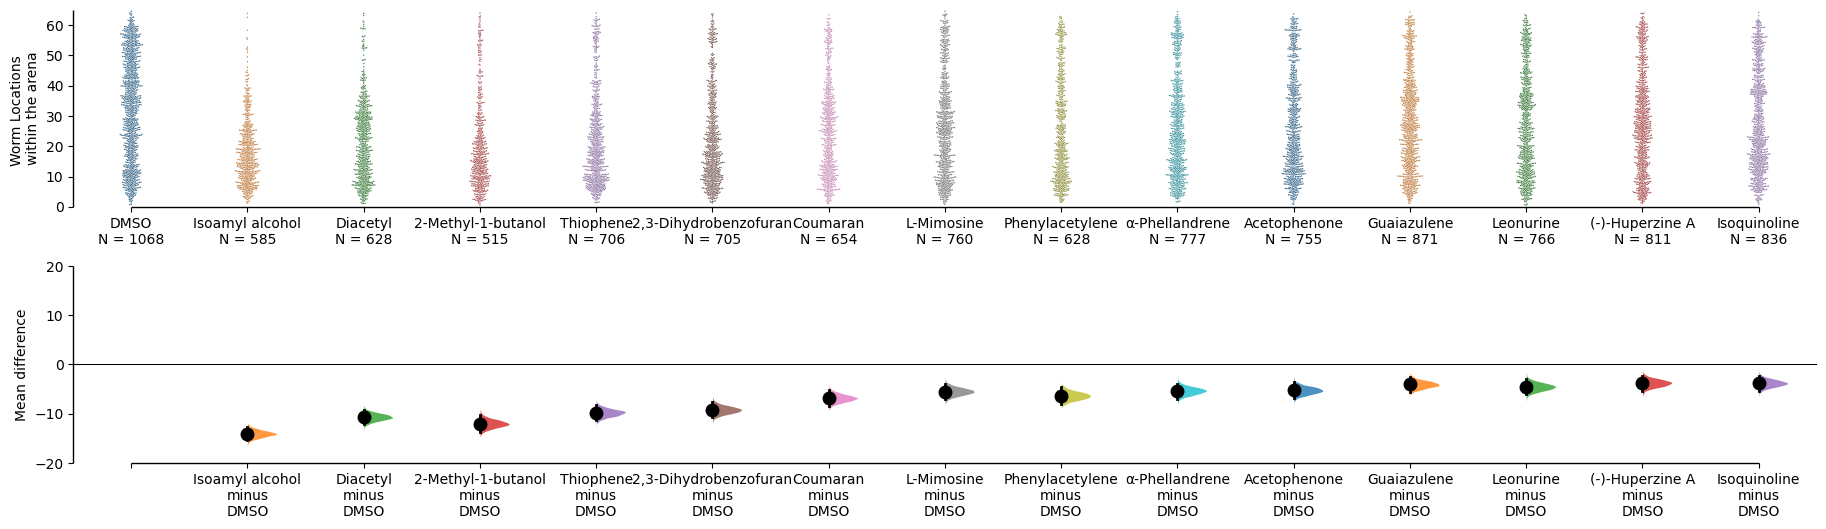

In [95]:
pos_locs = pooled_df[pos_ordr]
pos_locs_mm = pos_locs.apply(lambda x: x/47)
pos_obj = db.load(pos_locs_mm, idx=(pos_ordr))
S1_pos_plt = pos_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena', contrast_ylim = (-20,20), swarm_ylim=(0,65))

In [85]:
neg = neg.sort_values(by='Chemotaxis', ascending=True)
neg = pd.concat([dmso, neg])
neg_ordr = neg['Compound'].to_list()
neg.head()

,Compound,Total Worms,Chemotaxis,Well width
31,DMSO,356.000000,-0.009224,3040.333333
4,1-octanol,217.333333,-0.458012,3042.333333
68,Phytol,208.333333,-0.424344,3034.333333
36,Ellagic acid,273.666667,-0.299082,3042.333333
58,Methyl palmitate,238.000000,-0.273133,3041.666667


/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


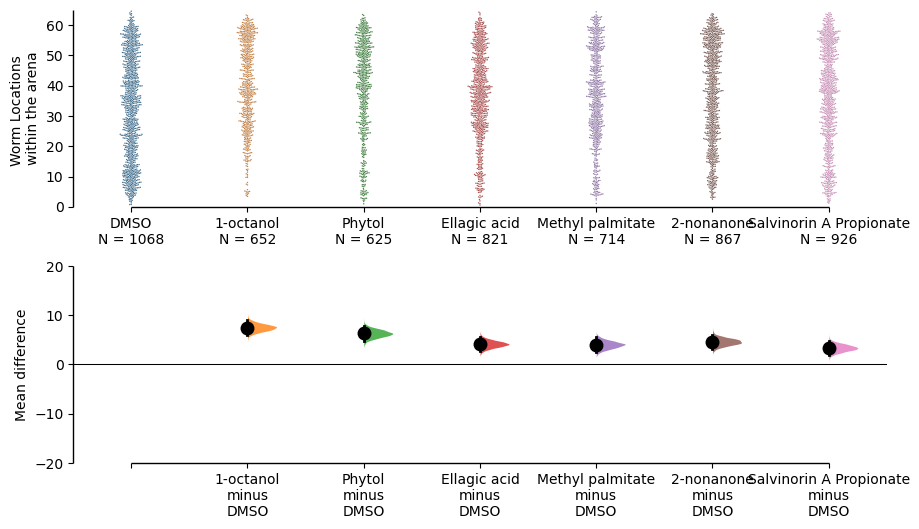

In [97]:
neg_locs = pooled_df[neg_ordr]
neg_locs_mm = neg_locs.apply(lambda x: x/47)
neg_obj = db.load(neg_locs_mm, idx=(neg_ordr))
S1_neg_plt = neg_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena', contrast_ylim = (-20,20), swarm_ylim=(0,65))

In [98]:
S1_neg_plt.savefig('/Volumes/LaCie/_2021_08_screen/neg_ci_plot.png')
S1_pos_plt.savefig('/Volumes/LaCie/_2021_08_screen/pos_ci_plot.png')

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """Entry point for launching an IPython kernel.
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


In [91]:
mean_width = ia_data['Well width'].mean()
print(mean_width)

3040.777777777778


In [105]:
pooled_df_mm = pooled_df.apply(lambda x: x/47)

In [107]:
#pooled_mm_obj = db.load(pooled_df_mm, idx=(cmpd_ordr))
results_df = pooled_mm_obj.mean_diff.results
results_df.to_csv('/Volumes/LaCie/_2021_08_screen/mean_diff.csv')

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


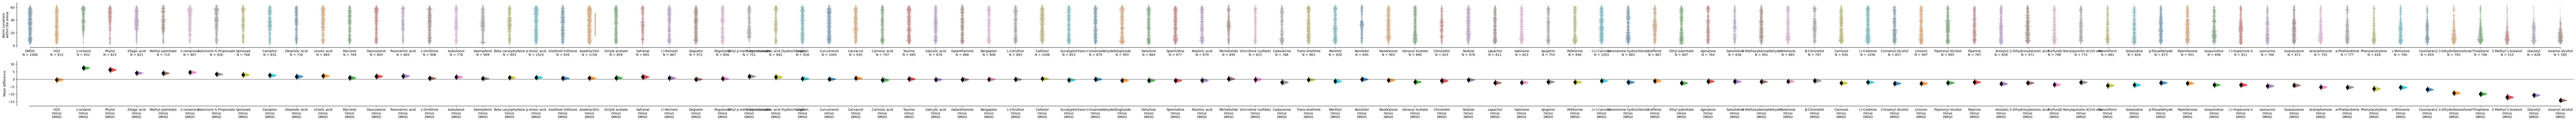

In [108]:
pooled_mm_plot = pooled_mm_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena')